Begin by importing the necessary Python modules: cdflib, NumPy, and matplotlib.

In [1]:
import cdflib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

First, lets print the contents of the CDF file containing the HIS data.

In [2]:
# Load in data.
cdf_file = cdflib.CDF('solo_L3_swa-his-comp_20220120_10min_V00_revD.cdf')

# Print contents.
for key, value in cdf_file.cdf_info().items():
    if type(value) == list:
        print(key, ': ' '\n')
        for var in value: print('   ', var)
        print('\n')
    else:
        print(key, ': ', value, '\n')

CDF :  C:\Users\tjeddy\Dropbox (University of Michigan)\Research\SolO\solo_L3_swa-his-comp_20220120_10min_V00_revD.cdf 

Version :  3.8.0 

Encoding :  6 

Majority :  Column_major 

rVariables : 



zVariables : 

    EPOCH
    ACCUM_SECONDS
    QUALITY_FLAG
    QUALITY_BITMASK
    AZIMUTH_SOURCE
    SW_TYPE
    NUMBER_OF_SCANS
    HE2_DENS
    HE2_DENS_ERR
    HE2_DENS_QF
    HE2_TEMP
    HE2_TEMP_ERR
    HE2_TEMP_QF
    HE2_VEL
    HE2_VEL_ERR
    HE2_VEL_QF
    C5_DENS
    C5_DENS_ERR
    C5_DENS_QF
    C5_TEMP
    C5_TEMP_ERR
    C5_TEMP_QF
    C5_VEL
    C5_VEL_ERR
    C5_VEL_QF
    O6_DENS
    O6_DENS_ERR
    O6_DENS_QF
    O6_TEMP
    O6_TEMP_ERR
    O6_TEMP_QF
    O6_VEL
    O6_VEL_ERR
    O6_VEL_QF
    FE10_DENS
    FE10_DENS_ERR
    FE10_DENS_QF
    FE10_TEMP
    FE10_TEMP_ERR
    FE10_TEMP_QF
    FE10_VEL
    FE10_VEL_ERR
    FE10_VEL_QF
    O_CHARGE_DIST
    O_CHARGE_DIST_ERR
    O_CHARGE_DIST_QF
    C_CHARGE_DIST
    C_CHARGE_DIST_ERR
    C_CHARGE_DIST_QF
    FE_CHARGE_DI

Next, we'll print the contents of an indvidual variable in the CDF file. Specifically, let's take a look at the oxygen charge state distributions.

In [3]:
# Choose variable.
variable = 'C_CHARGE_DIST'

# Print contents.
print(variable, ' Variables:', '\n')
for key, val in cdf_file.varinq(variable).items(): print('   ', key, ' : ', val)

print('\n')

print(variable, ' Attributes:', '\n')
for key, val in cdf_file.varattsget(variable).items(): print('   ', key, ' : ', val)

C_CHARGE_DIST  Variables: 

    Variable  :  C_CHARGE_DIST
    Num  :  46
    Var_Type  :  zVariable
    Data_Type  :  44
    Data_Type_Description  :  CDF_FLOAT
    Num_Elements  :  1
    Num_Dims  :  1
    Dim_Sizes  :  [3]
    Sparse  :  No_sparse
    Last_Rec  :  143
    Rec_Vary  :  True
    Dim_Vary  :  [-1]
    Pad  :  [-1.e+30]
    Compress  :  6
    Block_Factor  :  5462


C_CHARGE_DIST  Attributes: 

    CATDESC  :  Carbon charge distribution
    DEPEND_0  :  EPOCH
    DEPEND_1  :  C_CHARGES
    DISPLAY_TYPE  :  time_series
    FIELDNAM  :  C_CHARGE_DIST
    FILLVAL  :  -1e+31
    FORMAT  :  E10.3
    LABL_PTR_1  :  C_CHARGE_LABELS
    SCALEMAX  :  10.0
    SCALEMIN  :  0.0
    SCALETYP  :  log
    UNITS  :  NONE
    VALIDMAX  :  10.0
    VALIDMIN  :  0.0
    VAR_TYPE  :  data
    VAR_NOTES  :  Carbon charge distribution for charges 4, 5, 6


Create plots and He2 and O6 velocities and depicting the oxygen charge state distribution. Use the data from 3/9.

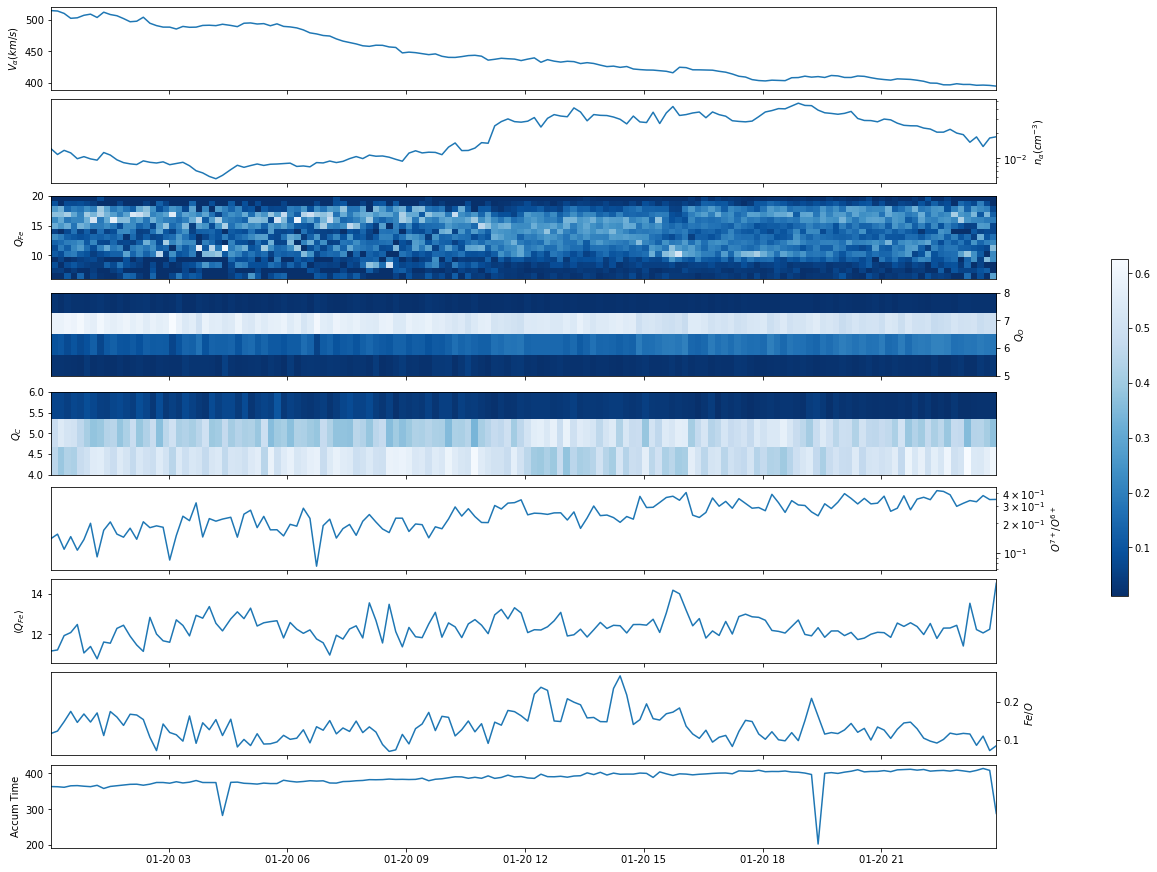

In [5]:
# Produce an array of datetime values from the Epoch variable. Convert nanoseconds to microseconds and add to start date January 01, 2000.
start_date = datetime.datetime(2000, 1, 1, 12)
time = [start_date + datetime.timedelta(microseconds=time/1e3) for time in cdf_file.varget('EPOCH')] 

# Create plotting figure and axes.
fig, ax = plt.subplots(9,1, figsize=(16,12), sharex=True, constrained_layout=True)

# Plot He+2 velocity and density.
ax[0].plot(time, cdf_file.varget('HE2_vel'))
ax[0].set_ylabel(r'$V_\alpha (km/s)$')

ax[1].plot(time, cdf_file.varget('HE2_dens'))
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$n_\alpha (cm^{-3})$')
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()

# Plot charge states as heatmaps.
fe_extent = mdates.date2num(time[0]), mdates.date2num(time[-1]), 6, 20
o_extent = mdates.date2num(time[0]), mdates.date2num(time[-1]), 5, 8
c_extent = mdates.date2num(time[0]), mdates.date2num(time[-1]), 4, 6

ax[2].imshow(np.transpose(cdf_file.varget('FE_CHARGE_DIST')), 'Blues_r', aspect='auto', extent=fe_extent)
ax[2].set_ylabel(r'$Q_{Fe}$')

ax[3].imshow(np.transpose(cdf_file.varget('O_CHARGE_DIST')), 'Blues_r', aspect='auto', extent=o_extent)
ax[3].set_ylabel(r'$Q_{O}$')
ax[3].yaxis.set_label_position('right')
ax[3].yaxis.tick_right()

pcm = ax[4].imshow(np.transpose(cdf_file.varget('C_CHARGE_DIST')), 'Blues_r', aspect='auto', extent=c_extent)
ax[4].set_ylabel(r'$Q_{C}$')

fig.colorbar(pcm,ax=ax, shrink=0.4)
 
# JPlot O+7/O+6 ratio, average Fe charge state, Fe/O abundance, and accumulation time. 
ax[5].plot(time, cdf_file.varget('O7_O6_RATIO'))
ax[5].set_yscale('log')
ax[5].set_ylabel(r'$O^{7+} / O^{6+}$')
ax[5].yaxis.set_label_position('right')
ax[5].yaxis.tick_right()

ax[6].plot(time, cdf_file.varget('FE_AVE_CHARGE'))
ax[6].set_ylabel(r'$\langle Q_{Fe} \rangle$')

ax[7].plot(time, cdf_file.varget('FE_O_ABUN'))
ax[7].set_ylabel(r'$Fe / O$')
ax[7].yaxis.set_label_position('right')
ax[7].yaxis.tick_right()

ax[8].plot(time, cdf_file.varget('ACCUM_SECONDS'))
ax[8].set_ylabel('Accum Time')

# Save results.
plt.savefig('cdf_test_20220120.png')